In [2]:
from datasets import Dataset
Dataset.cleanup_cache_files
from datasets import load_dataset
import pandas as pd

IRFL_images = load_dataset("lampent/IRFL", data_files='IRFL_images.zip')['train']

# IRFL dataset of figurative phrase-image pairs (10k+ images)
IRFL_idioms_dataset = load_dataset("lampent/IRFL", 'idioms-dataset')['dataset']
IRFL_similes_dataset = load_dataset("lampent/IRFL", 'similes-dataset')['dataset']
IRFL_metaphors_dataset = load_dataset("lampent/IRFL", 'metaphors-dataset')['dataset']

print('Successfully loaded IRFL dataset and tasks')

Successfully loaded IRFL dataset and tasks


In [3]:
IRFL_images[0]['image'].filename

'/home/zqi2/.cache/huggingface/datasets/downloads/extracted/603ad60de34ff98f510bc6a8a09f5071db85f051ffb09f92aef3d555036c1cda/images/100013652805807501328537227136590142362627084560469256603219911990964844016557.jpeg'

In [6]:
pd.DataFrame(IRFL_idioms_dataset).head()

,IRFL_id,annotations,category,literal_candidate,phrase,query,rank,source,uuid,definition,figurative_type
0,6372933026274098672734891785206981608478080193...,"['None', 'None', 'None', 'None', 'None']",None,False,a little bird told me,I received the information from a source not t...,1,https://www.science.org/doi/10.1126/sciadv.aay...,6372933026274098672734891785206981608478080193...,['I received the information from a source not...,idiom
1,2264012059128528847681353831285332760714914694...,"['Figurative+Literal', 'Literal', 'Figurative+...",Figurative+Literal,True,a little bird told me,a little bird told me,2,https://www.vectorstock.com/royalty-free-vecto...,2264012059128528847681353831285332760714914694...,['I received the information from a source not...,idiom
2,2970500809659499579266821173012282594209082880...,"['Literal', 'Literal', 'Literal', 'Partial Lit...",Literal,True,a little bird told me,a little bird told me,1,https://www.istockphoto.com/illustrations/a-li...,2970500809659499579266821173012282594209082880...,['I received the information from a source not...,idiom
3,1066704153386479799672335240437076214661283009...,"['Figurative+Literal', 'Literal', 'Figurative+...",Figurative+Literal,True,a little bird told me,a little bird told me,3,https://joryfisher.com/2014/09/a-little-birdie...,1066704153386479799672335240437076214661283009...,['I received the information from a source not...,idiom
4,1515299820314437205492113156169356771249304209...,"['Figurative+Literal', 'Literal', 'Partial Lit...",No Category,True,a little bird told me,a little bird told me,4,https://www.function1.com/2012/06/a-little-bir...,1515299820314437205492113156169356771249304209...,['I received the information from a source not...,idiom


In [7]:
pd.DataFrame(IRFL_metaphors_dataset).head()

,phrase,figurative_type,source,uuid,category,theme
0,a lion on the battlefield,metaphor,https://www.israelhayom.com/2022/03/01/ukraini...,1009925977381951166573538219201192200312184397...,Figurative,NaN
1,a lion on the battlefield,metaphor,https://www.army.mil/article/260659/soldier_fo...,1110158887118147260462183682336548897929003447...,Figurative,NaN
2,a lion on the battlefield,metaphor,https://www.spokesman.com/stories/2012/aug/03/...,1150022408148171978092024654350648179128902573...,Figurative,NaN
3,a lion on the battlefield,metaphor,https://www.theguardian.com/books/2016/feb/26/...,4334616426942719694991676075800911426738633635...,Figurative,NaN
4,a lion on the battlefield,metaphor,https://www.polygon.com/22396791/battlefield-6...,6641158141547602068103775945956449252322278422...,Figurative,NaN


In [5]:
pd.DataFrame(IRFL_similes_dataset).head()

,phrase,property,source,figurative_type,uuid,concept,concept_type,category
0,as pale as a ghost,pale,https://www.nytimes.com/2017/07/05/movies/revi...,simile,1068054163897197182793608206317967444090494179...,ghost,source,Partial Literal
1,as pale as a ghost,pale,https://www.hgtv.com/lifestyle/entertaining/ho...,simile,1086357953128103686909604623283801654830306384...,ghost,source,Partial Literal
2,as pale as a ghost,pale,https://ghost-official.com/,simile,1101670256256984939263793142343668592856355805...,ghost,source,Partial Literal
3,as pale as a ghost,pale,https://depositphotos.com/stock-photos/pale-gh...,simile,1195684745265204069409564066236564514917073218...,ghost,source,Partial Literal
4,as pale as a ghost,pale,https://ghost-official.com/,simile,3048588828459496545740207214473425746334167695...,ghost,source,Partial Literal


In [5]:
# join all uuids from the three datasets
all_uuids = list(IRFL_idioms_dataset['uuid']) + list(IRFL_metaphors_dataset['uuid']) + list(IRFL_similes_dataset['uuid'])
all_uuids_set = set(all_uuids)
print(f'Number of unique images: {len(all_uuids_set)}')
print(f'Number of total images: {len(all_uuids)}')

Number of unique images: 9950
Number of total images: 10749


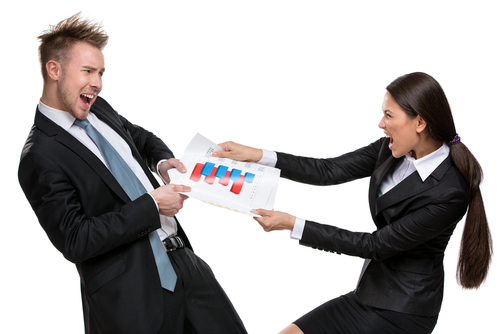

In [6]:
import PIL.Image as Image

def get_image_path_from_hugginface_cache(image_name):
    chached_image_path = IRFL_images[0]['image'].filename
    chached_image_name = chached_image_path.split('/')[-1]
    return chached_image_path.replace(chached_image_name, image_name.split('.')[0] + '.jpeg')

def get_image(image_name):
  image_path = get_image_path_from_hugginface_cache(image_name)
  return Image.open(image_path)

get_image('23671399455448973596548783550705533718080580071745863224510509451054839685279')

In [7]:
chached_image_path = IRFL_images[0]['image'].filename
cached_image_dir = '/'.join(chached_image_path.split('/')[:-1])
print(cached_image_dir)

/root/.cache/huggingface/datasets/downloads/extracted/806d3f12a261452d34d3d465840b97b17bf47adab5777a0f54fdd248dcd272c0/images


In [9]:
import os
image_names = list(os.listdir(cached_image_dir))
print(len(image_names))
print(image_names[:5])

10062
['100013652805807501328537227136590142362627084560469256603219911990964844016557.jpeg', '100051797212773049576075454781408842591196957426173451021051122189396667323439.jpeg', '100068386681015325388089056308216138409571954053446810740389681871101277440278.jpeg', '100080147390651896384967305857865934729532409628000568460418194210717463590588.jpeg', '100088030620347346054568331734504620978843051159464716401140441557414698228556.jpeg']


In [12]:
count = 0
for image_name in image_names:
    image_id, _ = image_name.split('.')
    if image_id not in all_uuids_set:
        count += 1
print(count)

112


In [13]:
for uuid in all_uuids:
    if uuid + '.jpeg' not in image_names:
        print(uuid)

In [10]:
import os
image_names = list(os.listdir("../irfl_data/image_data"))
print(len(image_names))
print(image_names[:5])

10062
['100013652805807501328537227136590142362627084560469256603219911990964844016557.jpeg', '100051797212773049576075454781408842591196957426173451021051122189396667323439.jpeg', '100068386681015325388089056308216138409571954053446810740389681871101277440278.jpeg', '100080147390651896384967305857865934729532409628000568460418194210717463590588.jpeg', '100088030620347346054568331734504620978843051159464716401140441557414698228556.jpeg']


In [4]:
simile_df = pd.DataFrame(IRFL_metaphors_dataset)
simile_df_filtered = simile_df[simile_df['phrase'].str.contains('like')]
pairs = list(zip(simile_df['uuid'], simile_df['phrase']))

with open('metaphor_data/image_text_pairs.txt', 'w') as f:
    for pair in pairs:
        f.write(f'{pair[0]} {pair[1]}\n')

In [11]:
idiom_df = pd.DataFrame(IRFL_idioms_dataset)
# remove entries with category None
idiom_df_filtered = idiom_df[idiom_df['category'].notna()]
print(len(idiom_df))
print(len(idiom_df_filtered))

6697
4059


In [12]:
pairs = list(zip(idiom_df_filtered['uuid'], idiom_df_filtered['phrase']))
with open('intermediate_data/idiom_image_text_pairs.txt', 'w') as f:
    for pair in pairs:
        f.write(f'{pair[0]} {pair[1]}\n')